TEAM ID:PNT2022TMID26942

#Importing required Libraries

In [3]:
!pip install tensorflow --upgrade

In [4]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [5]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [6]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras


In [7]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#Loading dataset

Dataset is available in tensorflow dataset repository

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Training Dataset has 60000 images & testing has 10000 images

In [10]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


#  Analyze the data

In [11]:

x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[3]

1

In [13]:
import matplotlib.pyplot as plt

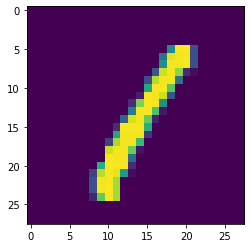

In [14]:
plt.imshow(x_train[3])

#Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [15]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

#Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [16]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [17]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Add CNN Layers

In [19]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

#Compiling the model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Train the model

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.2007 - accuracy: 0.9517 - val_loss: 0.0880 - val_accuracy: 0.9702
Epoch 2/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0650 - accuracy: 0.9807 - val_loss: 0.0803 - val_accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0714 - val_accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0927 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.1211 - val_accuracy: 0.9733


#Observing the Metrics

In [22]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.12106233835220337, 0.9732999801635742]


#Test the model

In [23]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[1.7257509e-14 3.3665829e-21 3.2568150e-11 2.5803416e-07 6.3908615e-16
  7.4321042e-16 1.7623624e-20 9.9999976e-01 5.6217719e-10 2.7898054e-08]
 [4.3319107e-12 3.0882997e-15 1.0000000e+00 2.7430214e-11 2.5284653e-22
  3.3692996e-18 5.5747875e-11 2.5061341e-26 1.4096492e-13 1.4347592e-21]
 [3.3339829e-06 9.9762863e-01 2.9957382e-05 3.0127218e-09 2.2882500e-03
  3.4871466e-06 6.8540955e-09 1.2071070e-05 3.4205230e-05 5.1712984e-08]
 [1.0000000e+00 5.9268486e-20 6.4476555e-14 2.1746183e-12 5.5577783e-15
  3.5143589e-11 2.0484855e-10 1.3627665e-15 9.9362792e-14 9.4941006e-09]
 [7.0570097e-15 5.2388087e-14 2.7850668e-17 2.6082391e-15 1.0000000e+00
  2.5486419e-18 2.5771281e-20 7.3892176e-17 2.3838508e-15 8.8520397e-13]]


In [24]:
import numpy as np

In [25]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [26]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#Save the Model

In [48]:
model.save('models/mnistcnn.h5')

In [28]:
cd models

/home/wsuser/work/models


In [57]:
!tar -zcvf HDR_Deployment.tgz mnistCNN.h5

mnistCNN.h5


In [59]:
ls -1

DigitRecog_IBM_model.tar.gz
hdr_deployment.tgz
HDR_Deployment.tgz
mnistCNN.h5
models/


In [31]:
!pip install watson-machine-learning-client --upgrade

# Cloud Deploy

In [51]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"8AZpbcxa4K4RWMIRsSTpK4UOzzf-nRBOCQQ2S4HoBerP"
}
client = APIClient(credentials)
client

In [33]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/14d571ceb9ec45fe98e6eac22b1fe65f:a2858581-aa42-498f-8101-3cb5eeb52609::',
      'guid': 'a2858581-aa42-498f-8101-3cb5eeb52609',
      'name': 'Watson Machine Learning-vu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'hdr',
    'scope': {'bss_account_id': '14d571ceb9ec45fe98e6eac22b1fe65f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '98aa0e16-84dc-4ca5-af32-24752ee67208',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '4c745639eeba4adb8d2f56fd2b57f351',
        'api_key': 'T16lCcwdvCpz4BUdQtm0QnMRtUmxyj_w78zt6doIpCx8',
        'secret_access_key': 'dde37ce0ae17d50ee939028eda9f9c44d20b54bcc2f9f67c',
        'service_id': 'ServiceId-8758d9a8-8ee7-40b6-a087-94e890958f1f'},
       'editor': {'access_key_id': '39926bf2c3864cf1812a88a8c661777b',
        'api_key': '6zyoE

In [52]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [54]:
space_uid = guid_from_space_name(client,'HDR Cloud Deployment')
print("Space UID = " + space_uid)

Space UID = 169e0c1d-c934-4bc8-a720-30c0e67b5c0f


In [55]:
client.set.default_space(space_uid)

'SUCCESS'

In [56]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [38]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [60]:
model_details = client.repository.store_model(model='HDR_Deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [61]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-14T11:47:42.909Z',
  'id': 'e2fc5d3e-16c4-4ea4-969a-e4975fd4f029',
  'modified_at': '2022-11-14T11:47:45.417Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-665002NSXA',
  'resource_key': '7a03bdc5-b75d-4693-b0a1-9e9e22a87a01',
  'space_id': '169e0c1d-c934-4bc8-a720-30c0e67b5c0f'},
 'system': {'warnings': []}}

In [62]:
model_id = client.repository.get_model_id(model_details)
model_id

'e2fc5d3e-16c4-4ea4-969a-e4975fd4f029'

In [65]:
client.repository.download(model_id,'DigitRecognization_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognization_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecognization_IBM_model.tar.gz'

In [66]:
ls

DigitRecog_IBM_model.tar.gz          hdr_deployment.tgz  mnistCNN.h5
DigitRecognization_IBM_model.tar.gz  HDR_Deployment.tgz  models/


#Test the saved model

inputs loaded from mnist

X_train:(60000, 28, 28, 1)
y_train:(60000, 10)
X_test:(10000, 28, 28, 1)
y_test:(10000, 10)


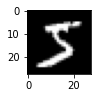

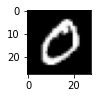

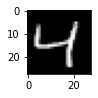

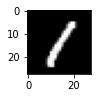

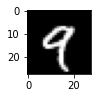

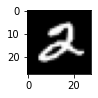

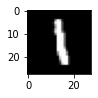

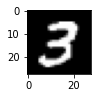

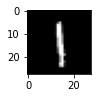

In [67]:

print('X_train:' +str(x_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(x_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

ouput predicted from saved model

inputs as hown are 5,0,4,1,9,2,1,3,1

In [68]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=x_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))

1/1 [==============================] - 0s 121ms/step
5
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 31ms/step
4
1/1 [==============================] - 0s 33ms/step
1
1/1 [==============================] - 0s 84ms/step
9
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 32ms/step
1
1/1 [==============================] - 0s 45ms/step
3
1/1 [==============================] - 0s 33ms/step
1
